In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 0:2]
y = iris.target

In [3]:
models = (svm.SVC(kernel='rbf', gamma=0.7, C=1), svm.SVC(kernel='poly', degree=3, C=1))

In [4]:
models = (clf.fit(X, y) for clf in models)

In [5]:
def make_meshgrid(x, y, h=.02):
    xx, yy = np.meshgrid(np.arange(x.min() - 1, x.max() + 1, h), np.arange(y.min() - 1,  y.max() + 1, h))
    return xx, yy

In [6]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

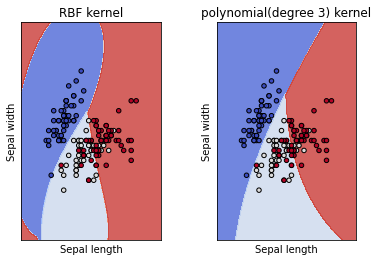

In [7]:
titles = ('RBF kernel','polynomial(degree 3) kernel')
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)